# **MAMBA-TKAN-LSTM**
**Wajdi Zarai , Zhaojing Huang (2024)**



## **1. INTRODUCTION**

The development of machine learning, particularly deep learning, has significantly advanced time series
analysis in finance (Filipovi ́c and Khalilzadeh), such as predicting future stock prices using Long and
Short Term Memory (LSTM) networks (Selvin et al.). Building on this, the performance of two
state-of-the-art models for stock price prediction will be examined:
- Kolmogorov-Arnold Networks (KANs) (Liu et al.), especially the Temporal Kolmogorov-Arnold Transformer Networks (TKANs) (Genet and Inzirillo), which utilize an attention mechanism to efficiently capture temporal patterns in multivariate data streams.
- Structured State Space Sequence model (S4) (Gu et al.), with its variant MAMBA (Guand Dao), known for excelling in long-range sequence modeling across domains like vision, language, and audio.

The study will implement these models to predict future stock prices and evaluate their performance within an asset allocation problem.

In [1]:
# Import Librairies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(15)
from google.colab import files
files.upload()

Saving BAJAJ-AUTO.csv to BAJAJ-AUTO (1).csv
Saving BAJAJFINSV.csv to BAJAJFINSV (1).csv
Saving BAJFINANCE.csv to BAJFINANCE (1).csv
Saving BRITANNIA.csv to BRITANNIA (1).csv
Saving CIPLA.csv to CIPLA (1).csv
Saving HEROMOTOCO.csv to HEROMOTOCO (1).csv
Saving HINDALCO.csv to HINDALCO (1).csv
Saving INDUSINDBK.csv to INDUSINDBK (1).csv
Saving ITC.csv to ITC (1).csv
Saving KOTAKBANK.csv to KOTAKBANK (1).csv
Saving loss_records.csv to loss_records (1).csv
Saving MARUTI.csv to MARUTI (1).csv
Saving NIFTY.csv to NIFTY (1).csv
Saving NTPC.csv to NTPC (1).csv
Saving ONGC.csv to ONGC (1).csv
Saving predictions.csv to predictions (1).csv
Saving RELIANCE.csv to RELIANCE (1).csv
Saving SHRIRAMFIN.csv to SHRIRAMFIN (1).csv
Saving TATACONSUM.csv to TATACONSUM (1).csv
Saving TATASTEEL.csv to TATASTEEL (1).csv
Saving TCS.csv to TCS (1).csv
Saving TITAN.csv to TITAN (1).csv
Saving WIPRO.csv to WIPRO (1).csv


{'BAJAJ-AUTO (1).csv': b'symbol,date,open,high,low,close,volume\r\nBAJAJ-AUTO,2008-06-09,287.5,287.5,262.0,274.4,642398\r\nBAJAJ-AUTO,2008-06-10,287.75,287.75,273.5,275.2,116236\r\nBAJAJ-AUTO,2008-06-11,280.0,280.0,264.0,265.25,175586\r\nBAJAJ-AUTO,2008-06-12,255.5,263.5,255.35,259.73,101458\r\nBAJAJ-AUTO,2008-06-13,257.13,262.5,250.6,252.95,247868\r\nBAJAJ-AUTO,2008-06-16,255.0,259.0,244.73,247.32,123184\r\nBAJAJ-AUTO,2008-06-17,245.23,255.0,241.3,253.35,142952\r\nBAJAJ-AUTO,2008-06-18,255.05,265.5,250.0,258.23,211010\r\nBAJAJ-AUTO,2008-06-19,250.1,263.5,250.1,256.27,280966\r\nBAJAJ-AUTO,2008-06-20,253.5,259.5,246.8,256.05,153312\r\nBAJAJ-AUTO,2008-06-23,250.0,257.45,249.5,251.15,179776\r\nBAJAJ-AUTO,2008-06-24,247.5,253.0,235.57,239.5,348262\r\nBAJAJ-AUTO,2008-06-25,225.0,251.0,225.0,248.65,145066\r\nBAJAJ-AUTO,2008-06-26,259.95,259.95,234.52,244.48,370468\r\nBAJAJ-AUTO,2008-06-27,232.95,238.43,217.5,226.98,521218\r\nBAJAJ-AUTO,2008-06-30,227.0,229.98,222.68,225.18,230012\r\nBAJAJ-AU

In [2]:
# Improt the stocks data we are working with the indian stock market daily data

import pandas as pd
df = pd.read_csv('BAJAJ-AUTO.csv')[['date', 'close']]
Stocks = ['BAJAJ-AUTO','BAJAJFINSV', 'BAJFINANCE', 'BRITANNIA', 'CIPLA', 'HEROMOTOCO', 'HINDALCO', 'INDUSINDBK', 'ITC', 'KOTAKBANK', 'MARUTI', 'NTPC', 'ONGC', 'RELIANCE', 'SHRIRAMFIN', 'TATACONSUM', 'TATASTEEL', 'TCS', 'TITAN', 'WIPRO', 'NIFTY']
for stock in Stocks:
  df1 = pd.read_csv(stock+'.csv')
  #print(df1.head())
  df[stock]= df1['close']
df.drop(['close'],axis=1, inplace=True)
print(df.head())

         date  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA   CIPLA  \
0  2008-06-09      274.40       62.99       19.16      74.46  206.45   
1  2008-06-10      275.20       66.93       19.14      74.15  210.70   
2  2008-06-11      265.25       65.35       17.84      73.89  218.30   
3  2008-06-12      259.73       60.59       16.86      74.53  217.20   
4  2008-06-13      252.95       58.08       14.77      74.38  210.90   

   HEROMOTOCO  HINDALCO  INDUSINDBK    ITC  ...    NTPC    ONGC  RELIANCE  \
0      772.20    175.60       66.55  69.12  ...  136.08  146.66    540.67   
1      765.40    176.20       68.75  67.19  ...  134.63  138.25    549.44   
2      810.25    177.05       69.10  66.50  ...  138.08  138.57    565.35   
3      814.50    177.55       71.15  66.65  ...  135.96  138.73    569.33   
4      784.25    176.05       75.05  66.05  ...  134.38  140.33    567.60   

   SHRIRAMFIN  TATACONSUM  TATASTEEL     TCS  TITAN   WIPRO    NIFTY  
0      315.65       78.54      82

In [3]:
!pip install mplfinance
import plotly.graph_objects as go
import mplfinance as mpf

In [4]:
data  = pd.read_csv('BAJAJ-AUTO.csv')
data.head()

symbol        date    open    high     low   close  volume
0  BAJAJ-AUTO  2008-06-09  287.50  287.50  262.00  274.40  642398
1  BAJAJ-AUTO  2008-06-10  287.75  287.75  273.50  275.20  116236
2  BAJAJ-AUTO  2008-06-11  280.00  280.00  264.00  265.25  175586
3  BAJAJ-AUTO  2008-06-12  255.50  263.50  255.35  259.73  101458
4  BAJAJ-AUTO  2008-06-13  257.13  262.50  250.60  252.95  247868

In [5]:
def image(stock):
  data  = pd.read_csv(stock+'.csv')
  fig = go.Figure(data=
    go.Candlestick(x=data.date,
                   open=data["open"],
                   high=data["high"],
                   low=data["low"],
                   close=data["close"])
  )
  fig.update_layout(
    title=stock + " stock prices",
    yaxis_title="Price ($)"
  )
  return fig.show()


In [6]:
for stock in Stocks:
  image(stock)

In [7]:
df.describe()

BAJAJ-AUTO   BAJAJFINSV   BAJFINANCE    BRITANNIA        CIPLA  \
count  3935.000000  3934.000000  3934.000000  3934.000000  3935.000000   
mean   2549.821029   512.442107  2175.165813  1829.822954   579.747942   
std    1397.571070   559.198955  2600.074011  1583.929727   281.720243   
min     150.950000     9.070000     4.770000    54.870000   160.100000   
25%    1672.975000    62.050000    87.000000   244.102500   349.950000   
50%    2541.950000   197.670000   758.845000  1470.685000   539.950000   
75%    3143.700000   818.142500  3714.325000  3251.300000   689.325000   
max    9276.100000  1907.660000  8168.550000  5361.300000  1504.100000   

        HEROMOTOCO     HINDALCO   INDUSINDBK          ITC    KOTAKBANK  ...  \
count  3935.000000  3935.000000  3935.000000  3935.000000  3935.000000  ...   
mean   2486.440864   215.138259   827.529149   218.955281   898.261220  ...   
std     780.835965   132.931109   540.955216    93.924271   640.267889  ...   
min     638.100000    37.400000    27.400000    49.670000    54.100000  ...   
25%    1899.250000   121.600000   319.050000   158.610000   283.715000  ...   
50%    2558.500000   175.200000   867.150000   219.750000   719.100000  ...   
75%    2977.500000   240.150000  1249.300000   266.100000  1552.625000  ...   
max    4908.850000   650.050000  2023.050000   492.150000  2210.950000  ...   

             NTPC         ONGC     RELIANCE   SHRIRAMFIN   TATACONSUM  \
count  3935.00000  3935.000000  3935.000000  3935.000000  3934.000000   
mean    141.60244   170.771878  1062.191723   954.349530   303.310351   
std      40.62433    42.822184   811.057662   433.712207   281.821300   
min      76.40000    60.000000   254.880000   182.850000    45.230000   
25%     118.42000   145.315000   455.835000   629.675000   119.042500   
50%     134.42000   174.130000   537.150000   931.550000   154.750000   
75%     152.52500   193.615000  1562.550000  1216.475000   381.087500   
max     363.50000   310.430000  3014.800000  2569.000000  1261.550000   

         TATASTEEL          TCS        TITAN        WIPRO         NIFTY  
count  3935.000000  3935.000000  3935.000000  3935.000000   3935.000000  
mean     59.483972  1589.331299   885.522376   246.654351   9708.899098  
std      32.558032  1122.751147   954.372939   136.084664   4875.277887  
min      14.880000   111.550000    35.120000    45.200000   2524.200000  
25%      37.685000   612.935000   224.650000   158.065000   5646.225000  
50%      48.630000  1254.800000   386.500000   207.260000   8459.650000  
75%      65.595000  2217.450000  1190.975000   279.340000  11777.300000  
max     167.700000  4219.250000  3866.650000   721.500000  22753.800000  

[8 rows x 21 columns]

In [8]:
df.isna().sum()

date          0
BAJAJ-AUTO    0
BAJAJFINSV    1
BAJFINANCE    1
BRITANNIA     1
CIPLA         0
HEROMOTOCO    0
HINDALCO      0
INDUSINDBK    0
ITC           0
KOTAKBANK     0
MARUTI        0
NTPC          0
ONGC          0
RELIANCE      0
SHRIRAMFIN    0
TATACONSUM    1
TATASTEEL     0
TCS           0
TITAN         0
WIPRO         0
NIFTY         0
dtype: int64

In [9]:
df.info

<bound method DataFrame.info of             date  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA    CIPLA  \
0     2008-06-09      274.40       62.99       19.16      74.46   206.45   
1     2008-06-10      275.20       66.93       19.14      74.15   210.70   
2     2008-06-11      265.25       65.35       17.84      73.89   218.30   
3     2008-06-12      259.73       60.59       16.86      74.53   217.20   
4     2008-06-13      252.95       58.08       14.77      74.38   210.90   
...          ...         ...         ...         ...        ...      ...   
3930  2024-04-24     8697.10     1655.55     7294.90    4844.15  1398.20   
3931  2024-04-25     8734.90     1597.35     6731.20    4800.45  1406.20   
3932  2024-04-26     8974.30     1595.65     6826.60    4799.85  1409.15   
3933  2024-04-29     8760.10     1615.00     6923.55    4775.95  1408.00   
3934  2024-04-30     8903.65         NaN         NaN        NaN  1400.00   

      HEROMOTOCO  HINDALCO  INDUSINDBK     ITC  ...    NTPC    ONGC  RELIANCE  \
0         772.20    175.60       66.55   69.12  ...  136.08  146.66    540.67   
1         765.40    176.20       68.75   67.19  ...  134.63  138.25    549.44   
2         810.25    177.05       69.10   66.50  ...  138.08  138.57    565.35   
3         814.50    177.55       71.15   66.65  ...  135.96  138.73    569.33   
4         784.25    176.05       75.05   66.05  ...  134.38  140.33    567.60   
...          ...       ...         ...     ...  ...     ...     ...       ...   
3930     4393.35    636.10     1474.65  428.90  ...  351.65  279.35   2900.35   
3931     4498.30    646.80     1496.10  437.55  ...  359.20  281.95   2919.95   
3932     4491.60    649.30     1446.40  440.00  ...  356.00  282.90   2905.10   
3933     4457.70    650.05     1487.25  438.20  ...  363.00  283.20   2930.05   
3934     4543.05    644.40     1515.70  435.65  ...  363.20  282.85   2934.00   

      SHRIRAMFIN  TATACONSUM  TATASTEEL      TCS    TITAN   WIPRO     NIFTY  
0         315.65       78.54      82.32   228.52    56.53  108.07   4500.95  
1         309.10       77.22      82.02   219.75    54.25  107.17   4449.80  
2         303.55       78.38      83.67   222.59    53.23  107.17   4523.60  
3         303.70       78.77      85.58   222.07    53.22  108.53   4539.35  
4         304.95       77.55      84.10   227.40    53.56  107.55   4517.10  
...          ...         ...        ...      ...      ...     ...       ...  
3930     2461.05     1106.25     165.55  3831.05  3609.75  459.90  22368.00  
3931     2491.85     1102.65     167.70  3852.20  3571.10  461.00  22402.40  
3932     2498.60     1098.50     165.80  3821.35  3584.80  464.60  22570.30  
3933     2492.20     1108.35     167.40  3870.20  3604.85  462.95  22419.90  
3934     2551.70         NaN     165.00  3820.65  3589.25  462.40  22643.40  

[3935 rows x 22 columns]>

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3935 entries, 0 to 3934
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3935 non-null   object 
 1   BAJAJ-AUTO  3935 non-null   float64
 2   BAJAJFINSV  3934 non-null   float64
 3   BAJFINANCE  3934 non-null   float64
 4   BRITANNIA   3934 non-null   float64
 5   CIPLA       3935 non-null   float64
 6   HEROMOTOCO  3935 non-null   float64
 7   HINDALCO    3935 non-null   float64
 8   INDUSINDBK  3935 non-null   float64
 9   ITC         3935 non-null   float64
 10  KOTAKBANK   3935 non-null   float64
 11  MARUTI      3935 non-null   float64
 12  NTPC        3935 non-null   float64
 13  ONGC        3935 non-null   float64
 14  RELIANCE    3935 non-null   float64
 15  SHRIRAMFIN  3935 non-null   float64
 16  TATACONSUM  3934 non-null   float64
 17  TATASTEEL   3935 non-null   float64
 18  TCS         3935 non-null   float64
 19  TITAN       3935 non-null  

In [11]:
df.dropna(inplace=True)
df.describe()

BAJAJ-AUTO   BAJAJFINSV   BAJFINANCE    BRITANNIA        CIPLA  \
count  3934.000000  3934.000000  3934.000000  3934.000000  3934.000000   
mean   2548.205923   512.442107  2175.165813  1829.822954   579.539438   
std    1394.071083   559.198955  2600.074011  1583.929727   281.452239   
min     150.950000     9.070000     4.770000    54.870000   160.100000   
25%    1672.662500    62.050000    87.000000   244.102500   349.950000   
50%    2540.925000   197.670000   758.845000  1470.685000   539.950000   
75%    3143.462500   818.142500  3714.325000  3251.300000   688.962500   
max    9276.100000  1907.660000  8168.550000  5361.300000  1504.100000   

        HEROMOTOCO     HINDALCO   INDUSINDBK          ITC    KOTAKBANK  ...  \
count  3934.000000  3934.000000  3934.000000  3934.000000  3934.000000  ...   
mean   2485.918086   215.029143   827.354220   218.900198   898.076754  ...   
std     780.246198   132.771645   540.912662    93.872624   640.244694  ...   
min     638.100000    37.400000    27.400000    49.670000    54.100000  ...   
25%    1899.250000   121.600000   319.050000   158.530000   283.707500  ...   
50%    2558.450000   175.175000   867.050000   219.710000   718.725000  ...   
75%    2976.787500   240.025000  1247.537500   266.050000  1550.362500  ...   
max    4908.850000   650.050000  2023.050000   492.150000  2210.950000  ...   

              NTPC         ONGC     RELIANCE   SHRIRAMFIN   TATACONSUM  \
count  3934.000000  3934.000000  3934.000000  3934.000000  3934.000000   
mean    141.546111   170.743388  1061.715920   953.943493   303.310351   
std      40.475512    42.790315   810.611326   433.018698   281.821300   
min      76.400000    60.000000   254.880000   182.850000    45.230000   
25%     118.420000   145.307500   455.752500   629.612500   119.042500   
50%     134.420000   174.130000   537.140000   930.675000   154.750000   
75%     152.490000   193.592500  1562.287500  1216.412500   381.087500   
max     363.500000   310.430000  3014.800000  2569.000000  1261.550000   

         TATASTEEL         TCS        TITAN        WIPRO         NIFTY  
count  3934.000000  3934.00000  3934.000000  3934.000000   3934.000000  
mean     59.457150  1588.76411   884.835104   246.599509   9705.611223  
std      32.518663  1122.32991   953.519875   136.058468   4871.532524  
min      14.880000   111.55000    35.120000    45.200000   2524.200000  
25%      37.682500   612.91750   224.650000   158.027500   5645.637500  
50%      48.625000  1254.79000   386.475000   207.255000   8459.300000  
75%      65.577500  2215.93750  1190.062500   279.150000  11766.425000  
max     167.700000  4219.25000  3866.650000   721.500000  22753.800000  

[8 rows x 21 columns]

In [12]:
Return= df.copy()
Return[Stocks] = Return[Stocks].pct_change()
Return.dropna(inplace=True)
Return.head()

date  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA     CIPLA  \
1  2008-06-10    0.002915    0.062550   -0.001044  -0.004163  0.020586   
2  2008-06-11   -0.036156   -0.023607   -0.067921  -0.003506  0.036070   
3  2008-06-12   -0.020811   -0.072839   -0.054933   0.008662 -0.005039   
4  2008-06-13   -0.026104   -0.041426   -0.123962  -0.002013 -0.029006   
5  2008-06-16   -0.022257    0.057163    0.050102  -0.007529  0.031294   

   HEROMOTOCO  HINDALCO  INDUSINDBK       ITC  ...      NTPC      ONGC  \
1   -0.008806  0.003417    0.033058 -0.027922  ... -0.010655 -0.057344   
2    0.058597  0.004824    0.005091 -0.010269  ...  0.025626  0.002315   
3    0.005245  0.002824    0.029667  0.002256  ... -0.015353  0.001155   
4   -0.037139 -0.008448    0.054814 -0.009002  ... -0.011621  0.011533   
5   -0.024865 -0.026697   -0.032645  0.016957  ...  0.029766  0.003634   

   RELIANCE  SHRIRAMFIN  TATACONSUM  TATASTEEL       TCS     TITAN     WIPRO  \
1  0.016221   -0.020751   -0.016807  -0.003644 -0.038377 -0.040333 -0.008328   
2  0.028957   -0.017955    0.015022   0.020117  0.012924 -0.018802  0.000000   
3  0.007040    0.000494    0.004976   0.022828 -0.002336 -0.000188  0.012690   
4 -0.003039    0.004116   -0.015488  -0.017294  0.024001  0.006389 -0.009030   
5  0.005268   -0.002295    0.006190   0.009512  0.001319 -0.028193  0.019898   

      NIFTY  
1 -0.011364  
2  0.016585  
3  0.003482  
4 -0.004902  
5  0.012265  

[5 rows x 22 columns]

In [13]:
Return.set_index(Return.date, inplace=True)
Return.drop('date', axis=1, inplace=True)
Return.head()

BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA     CIPLA  \
date                                                                  
2008-06-10    0.002915    0.062550   -0.001044  -0.004163  0.020586   
2008-06-11   -0.036156   -0.023607   -0.067921  -0.003506  0.036070   
2008-06-12   -0.020811   -0.072839   -0.054933   0.008662 -0.005039   
2008-06-13   -0.026104   -0.041426   -0.123962  -0.002013 -0.029006   
2008-06-16   -0.022257    0.057163    0.050102  -0.007529  0.031294   

            HEROMOTOCO  HINDALCO  INDUSINDBK       ITC  KOTAKBANK  ...  \
date                                                               ...   
2008-06-10   -0.008806  0.003417    0.033058 -0.027922  -0.014891  ...   
2008-06-11    0.058597  0.004824    0.005091 -0.010269   0.016264  ...   
2008-06-12    0.005245  0.002824    0.029667  0.002256  -0.025794  ...   
2008-06-13   -0.037139 -0.008448    0.054814 -0.009002  -0.011596  ...   
2008-06-16   -0.024865 -0.026697   -0.032645  0.016957   0.028091  ...   

                NTPC      ONGC  RELIANCE  SHRIRAMFIN  TATACONSUM  TATASTEEL  \
date                                                                          
2008-06-10 -0.010655 -0.057344  0.016221   -0.020751   -0.016807  -0.003644   
2008-06-11  0.025626  0.002315  0.028957   -0.017955    0.015022   0.020117   
2008-06-12 -0.015353  0.001155  0.007040    0.000494    0.004976   0.022828   
2008-06-13 -0.011621  0.011533 -0.003039    0.004116   -0.015488  -0.017294   
2008-06-16  0.029766  0.003634  0.005268   -0.002295    0.006190   0.009512   

                 TCS     TITAN     WIPRO     NIFTY  
date                                                
2008-06-10 -0.038377 -0.040333 -0.008328 -0.011364  
2008-06-11  0.012924 -0.018802  0.000000  0.016585  
2008-06-12 -0.002336 -0.000188  0.012690  0.003482  
2008-06-13  0.024001  0.006389 -0.009030 -0.004902  
2008-06-16  0.001319 -0.028193  0.019898  0.012265  

[5 rows x 21 columns]

In [14]:
import plotly.express as px

In [15]:
for stock in Stocks[:5]:
  fig = px.line(data_frame=Return, y=stock,title= stock + " return")
  fig.show()

In [16]:
ddate = pd.date_range('6/9/2008', '29/4/2024', freq='D')
ddate

DatetimeIndex(['2008-06-09', '2008-06-10', '2008-06-11', '2008-06-12',
               '2008-06-13', '2008-06-14', '2008-06-15', '2008-06-16',
               '2008-06-17', '2008-06-18',
               ...
               '2024-04-20', '2024-04-21', '2024-04-22', '2024-04-23',
               '2024-04-24', '2024-04-25', '2024-04-26', '2024-04-27',
               '2024-04-28', '2024-04-29'],
              dtype='datetime64[ns]', length=5804, freq='D')

In [17]:
#df.set_index(df.date, inplace=True)
#df.drop('date', axis=1, inplace=True)
df.head()

date  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA   CIPLA  \
0  2008-06-09      274.40       62.99       19.16      74.46  206.45   
1  2008-06-10      275.20       66.93       19.14      74.15  210.70   
2  2008-06-11      265.25       65.35       17.84      73.89  218.30   
3  2008-06-12      259.73       60.59       16.86      74.53  217.20   
4  2008-06-13      252.95       58.08       14.77      74.38  210.90   

   HEROMOTOCO  HINDALCO  INDUSINDBK    ITC  ...    NTPC    ONGC  RELIANCE  \
0      772.20    175.60       66.55  69.12  ...  136.08  146.66    540.67   
1      765.40    176.20       68.75  67.19  ...  134.63  138.25    549.44   
2      810.25    177.05       69.10  66.50  ...  138.08  138.57    565.35   
3      814.50    177.55       71.15  66.65  ...  135.96  138.73    569.33   
4      784.25    176.05       75.05  66.05  ...  134.38  140.33    567.60   

   SHRIRAMFIN  TATACONSUM  TATASTEEL     TCS  TITAN   WIPRO    NIFTY  
0      315.65       78.54      82.32  228.52  56.53  108.07  4500.95  
1      309.10       77.22      82.02  219.75  54.25  107.17  4449.80  
2      303.55       78.38      83.67  222.59  53.23  107.17  4523.60  
3      303.70       78.77      85.58  222.07  53.22  108.53  4539.35  
4      304.95       77.55      84.10  227.40  53.56  107.55  4517.10  

[5 rows x 22 columns]

In [18]:
# we are going in this section to define the output section

df1 = df.copy()
for stock in Stocks:
  df1[stock+ '_output'] = df1[stock].shift(-1)
df1.head()

date  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA   CIPLA  \
0  2008-06-09      274.40       62.99       19.16      74.46  206.45   
1  2008-06-10      275.20       66.93       19.14      74.15  210.70   
2  2008-06-11      265.25       65.35       17.84      73.89  218.30   
3  2008-06-12      259.73       60.59       16.86      74.53  217.20   
4  2008-06-13      252.95       58.08       14.77      74.38  210.90   

   HEROMOTOCO  HINDALCO  INDUSINDBK    ITC  ...  NTPC_output  ONGC_output  \
0      772.20    175.60       66.55  69.12  ...       134.63       138.25   
1      765.40    176.20       68.75  67.19  ...       138.08       138.57   
2      810.25    177.05       69.10  66.50  ...       135.96       138.73   
3      814.50    177.55       71.15  66.65  ...       134.38       140.33   
4      784.25    176.05       75.05  66.05  ...       138.38       140.84   

   RELIANCE_output  SHRIRAMFIN_output  TATACONSUM_output  TATASTEEL_output  \
0           549.44             309.10              77.22             82.02   
1           565.35             303.55              78.38             83.67   
2           569.33             303.70              78.77             85.58   
3           567.60             304.95              77.55             84.10   
4           570.59             304.25              78.03             84.90   

   TCS_output  TITAN_output  WIPRO_output  NIFTY_output  
0      219.75         54.25        107.17       4449.80  
1      222.59         53.23        107.17       4523.60  
2      222.07         53.22        108.53       4539.35  
3      227.40         53.56        107.55       4517.10  
4      227.70         52.05        109.69       4572.50  

[5 rows x 43 columns]

In [19]:
df_raw = df.copy()
df['NIFTY'] = df['NIFTY'].shift(-1)
df.dropna(inplace=True)
df.tail()

date  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  BRITANNIA    CIPLA  \
3928  2024-04-22     8795.75     1621.10     7259.90    4797.80  1354.85   
3929  2024-04-23     8795.80     1630.35     7329.15    4828.95  1346.70   
3930  2024-04-24     8697.10     1655.55     7294.90    4844.15  1398.20   
3931  2024-04-25     8734.90     1597.35     6731.20    4800.45  1406.20   
3932  2024-04-26     8974.30     1595.65     6826.60    4799.85  1409.15   

      HEROMOTOCO  HINDALCO  INDUSINDBK     ITC  ...    NTPC    ONGC  RELIANCE  \
3928     4311.90    618.55     1477.50  425.30  ...  342.90  276.80   2959.70   
3929     4345.05    611.80     1474.50  429.20  ...  347.15  276.80   2918.65   
3930     4393.35    636.10     1474.65  428.90  ...  351.65  279.35   2900.35   
3931     4498.30    646.80     1496.10  437.55  ...  359.20  281.95   2919.95   
3932     4491.60    649.30     1446.40  440.00  ...  356.00  282.90   2905.10   

      SHRIRAMFIN  TATACONSUM  TATASTEEL      TCS    TITAN  WIPRO    NIFTY  
3928     2424.65     1173.35     161.85  3864.60  3596.75  462.0  22336.4  
3929     2426.95     1110.15     161.15  3874.70  3633.00  462.1  22368.0  
3930     2461.05     1106.25     165.55  3831.05  3609.75  459.9  22402.4  
3931     2491.85     1102.65     167.70  3852.20  3571.10  461.0  22570.3  
3932     2498.60     1098.50     165.80  3821.35  3584.80  464.6  22419.9  

[5 rows x 22 columns]

In [20]:
price_diff = df['NIFTY'].diff()
# Replacing the change with 1 if positive, else 0
e_seq = np.array(price_diff.apply(lambda x: 1 if x > 0 else 0).values);
e_seq

array([0, 1, 1, ..., 1, 1, 0])

In [21]:
df.shape

(3933, 22)

In [22]:
len(e_seq)

3933

In [23]:
from sklearn.preprocessing import MinMaxScaler
val_split = 0.3
train_split = 0.9
train_size = int(len(df) * train_split)
val_size = int(train_size * val_split)
test_size = int(len(df) - train_size)
window_size = 20

def data_split(df, len_train):

  ts = test_size
  split_time = len(df) - ts
  test_time = df.iloc[split_time + window_size :, 0:1].values

  Xdf, ydf = df.iloc[:, 1:len_train], df.iloc[:, -1]
  X = Xdf.astype("float32")
  y = ydf.astype("float32")
  y_train_set = y[:split_time]
  y_test_set = y[split_time:]
  X_train_set = X[:split_time]
  X_test_set = X[split_time:]
  n_features = X_train_set.shape[1]

  # Third, we proceed with scaling inputs to the model. Note how this isspecially important now (compare to past tasks) because we are no longer␣dealing with returns, but with prices!
  scaler_input = MinMaxScaler(feature_range=(-1, 1))
  scaler_input.fit(X_train_set)
  X_train_set_scaled = scaler_input.transform(X_train_set)
  X_test_set_scaled = scaler_input.transform(X_test_set)
  mean_ret = np.mean(y_train_set)
  scaler_output = MinMaxScaler(feature_range=(-1, 1))
  y_train_set = y_train_set.values.reshape(len(y_train_set), 1)
  y_test_set = y_test_set.values.reshape(len(y_test_set), 1)
  scaler_output.fit(y_train_set)
  y_train_set_scaled = scaler_output.transform(y_train_set)
  # Lastly, because we want a time series with up to 20 (window_size) past observations, we need to append these observations into our matrix/vectors!
  training_time = df.iloc[:split_time, 0:1].values
  X_train = []
  y_train = []
  for i in range(window_size, y_train_set_scaled.shape[0]):
    X_train.append(X_train_set_scaled[i - window_size : i, :])
    y_train.append(y_train_set_scaled[i])
  X_train, y_train = np.array(X_train), np.array(y_train)
  print("Size of X vector in training:", X_train.shape)
  print("Size of Y vector in training:", y_train.shape)
  X_test = []
  y_test = y_test_set
  for i in range(window_size, y_test_set.shape[0]):
    X_test.append(X_test_set_scaled[i - window_size : i, :])
  X_test, y_test = np.array(X_test), np.array(y_test)
  print("Size of X vector in test:", X_test.shape)
  print("Size of Y vector in test:", y_test.shape)
  print("Number of features in the model: ", n_features)
  return X_train, y_train, X_test, y_test, n_features, scaler_output, test_time

X_train, y_train, X_test, y_test, n_features, scaler_output, test_time = data_split(df, 21)

Size of X vector in training: (3519, 20, 20)
Size of Y vector in training: (3519, 1)
Size of X vector in test: (374, 20, 20)
Size of Y vector in test: (394, 1)
Number of features in the model:  20


In [24]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], n_features)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(50, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(200, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(200, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(200, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(100, return_sequences=False),
  tf.keras.layers.Dense(60),
  tf.keras.layers.Dense(1),
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 50)              │          14,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20, 200)             │         200,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 20, 200)             │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 20, 200)             │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 60)                  │           6,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,003,321 (3.83 MB)

 Trainable params: 1,003,321 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from keras.callbacks import EarlyStopping
hp_lr = 1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr), loss="mean_absolute_error")
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10, restore_best_weights=True)
# fit the models
history_lstm =model.fit(X_train,
  y_train,
  validation_split=0.2,
  epochs=500,
  batch_size=64,
  verbose=1,
  callbacks=[es],
  )

Epoch 1/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 43s 414ms/step - loss: 0.2614 - val_loss: 0.5797
Epoch 2/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 408ms/step - loss: 0.0509 - val_loss: 0.5367
Epoch 3/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 375ms/step - loss: 0.0456 - val_loss: 0.4664
Epoch 4/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 380ms/step - loss: 0.0389 - val_loss: 0.4198
Epoch 5/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 454ms/step - loss: 0.0364 - val_loss: 0.4164
Epoch 6/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 389ms/step - loss: 0.0355 - val_loss: 0.4129
Epoch 7/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 395ms/step - loss: 0.0340 - val_loss: 0.4162
Epoch 8/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 467ms/step - loss: 0.0332 - val_loss: 0.4197
Epoch 9/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 410ms/step - loss: 0.0336 - val_loss: 0.4197
Epoch 10/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 381ms/step - loss: 0.0327 - val_loss: 0.4269
Epoch 11/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 395ms/step - loss: 0.0323 - val_loss: 0.4393
Epoch 12/500
44/44 ━━━━━━━━━━━

In [27]:
prediction = model.predict(X_test)
print(prediction.shape)

predictions = scaler_output.inverse_transform(prediction)
predictions = predictions.flatten()

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step
(374, 1)


In [28]:


values = np.array(y_test[window_size:])
values = values.flatten()
values

array([17730.75, 17656.35, 17736.95, 17786.8 , 18012.2 , 18145.4 ,
       18082.85, 18052.7 , 18117.15, 18202.8 , 18157.  , 18028.2 ,
       18349.7 , 18329.15, 18403.4 , 18409.65, 18343.9 , 18307.65,
       18159.95, 18244.2 , 18267.25, 18484.1 , 18512.75, 18562.75,
       18618.05, 18758.35, 18812.5 , 18696.1 , 18701.05, 18642.75,
       18560.5 , 18609.35, 18496.6 , 18497.15, 18608.  , 18660.3 ,
       18414.9 , 18269.  , 18420.45, 18385.3 , 18199.1 , 18127.35,
       17806.8 , 18014.6 , 18132.3 , 18122.5 , 18191.  , 18105.3 ,
       18197.45, 18232.55, 18042.95, 17992.15, 17859.45, 18101.2 ,
       17914.15, 17895.7 , 17858.2 , 17956.6 , 17894.85, 18053.3 ,
       18165.35, 18107.85, 18027.65, 18118.55, 18118.3 , 17891.95,
       17604.35, 17648.95, 17662.15, 17616.3 , 17610.4 , 17854.05,
       17764.6 , 17721.5 , 17871.7 , 17893.45, 17856.5 , 17770.9 ,
       17929.85, 18015.85, 18035.85, 17944.2 , 17844.6 , 17826.7 ,
       17554.3 , 17511.25, 17465.8 , 17392.7 , 17303.95, 17450

In [29]:
df_predictions = pd.DataFrame(
{"Date": test_time.flatten(), "Pred RNN": predictions, "values": values}
)
df_predictions.Date = pd.to_datetime(df_predictions.Date, format="%Y-%m-%d")
df_predictions.head()

Date      Pred RNN        values
0 2022-10-21  12299.488281  17730.750000
1 2022-10-24  12294.970703  17656.349609
2 2022-10-25  12302.358398  17736.949219
3 2022-10-27  12309.135742  17786.800781
4 2022-10-28  12315.023438  18012.199219

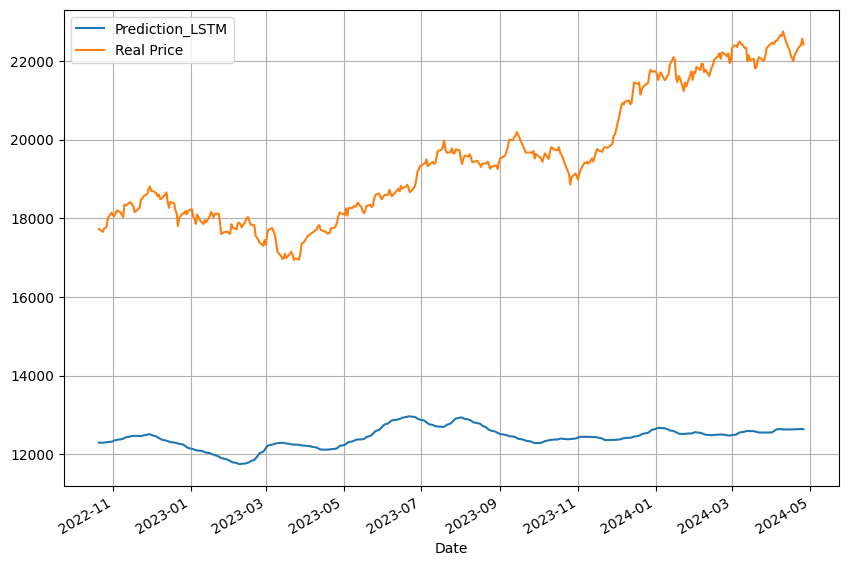

In [30]:
import matplotlib.pyplot as plt
plt_1 = plt.figure(figsize=(10, 7))
ax = plt.gca()
df_predictions.plot(x="Date", y="Pred RNN", label="Prediction_LSTM", ax=ax)
df_predictions.plot(x="Date", y="values", label="Real Price", ax=ax)
plt.grid()
plt.show()

#TKAN

In [31]:
!pip install tkan==0.3.0
import time
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense, Flatten, Input

from tkan import TKAN
from sklearn.metrics import r2_score

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [32]:


model_tkan = Sequential([
    Input(shape=X_train.shape[1:]),
    TKAN(100, tkan_activations=[{'grid_size': 20} for i in range(10)], sub_kan_output_dim = 20, sub_kan_input_dim = 1, return_sequences=True),
    TKAN(100, tkan_activations=[{'grid_size': 20} for i in range(10)], sub_kan_output_dim = 20, sub_kan_input_dim = 1, return_sequences=False),
    Dense(units=1, activation='linear')
])


model_tkan.compile(optimizer='adam', loss='mean_squared_error')

model_tkan.summary()

history = model_tkan.fit(X_train, y_train, batch_size=50, epochs=50, validation_split=val_split, verbose = False)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ tkan (TKAN)                          │ (None, 20, 100)             │          62,470 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ tkan_1 (TKAN)                        │ (None, 100)                 │          87,270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,841 (585.32 KB)

 Trainable params: 149,301 (583.21 KB)

 Non-trainable params: 540 (2.11 KB)

In [35]:
preds = model_tkan.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step


In [36]:
predictions_tkan = scaler_output.inverse_transform(preds)
predictions_tkan = predictions_tkan.flatten()
pred_S4 = pd.read_csv('predictions.csv')
pred_S4

Raw_Prediction  Prediction
0          0.422407   13869.924
1          0.423143   13875.796
2          0.423838   13881.335
3          0.423829   13881.267
4          0.423768   13880.775
..              ...         ...
369        0.321165   13062.376
370        0.320975   13060.861
371        0.320675   13058.461
372        0.320714   13058.778
373        0.319947   13052.657

[374 rows x 2 columns]

        Date      Pred RNN        values     Pred Tkan    Pred S4
0 2022-10-21  12299.488281  17730.750000  12180.424805  13869.924
1 2022-10-24  12294.970703  17656.349609  12187.330078  13875.796
2 2022-10-25  12302.358398  17736.949219  12196.675781  13881.335
3 2022-10-27  12309.135742  17786.800781  12314.596680  13881.267
4 2022-10-28  12315.023438  18012.199219  12357.222656  13880.775


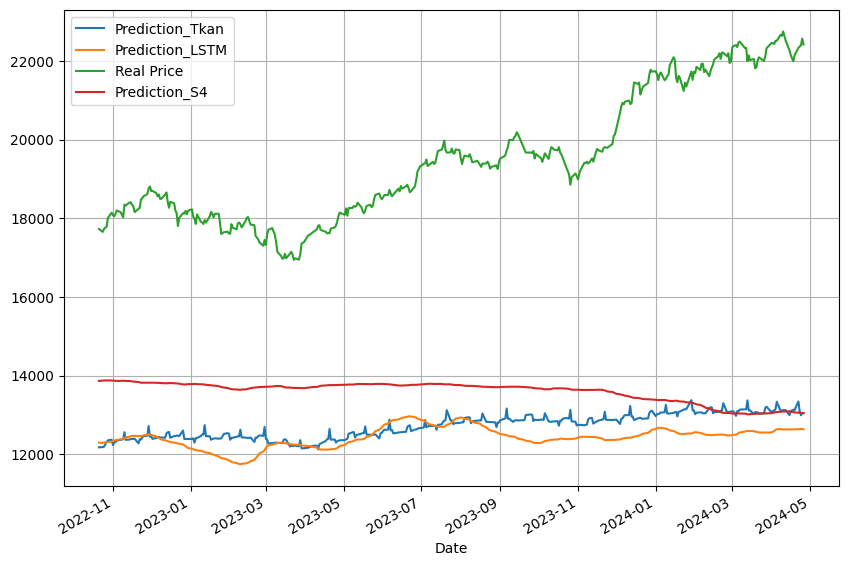

In [37]:
df_predictions['Pred Tkan'] = predictions_tkan
df_predictions['Pred S4'] = pred_S4['Prediction']
print(df_predictions.head())
plt_1 = plt.figure(figsize=(10, 7))
ax = plt.gca()
df_predictions.plot(x="Date", y="Pred Tkan", label="Prediction_Tkan", ax=ax)
df_predictions.plot(x="Date", y="Pred RNN", label="Prediction_LSTM", ax=ax)
df_predictions.plot(x="Date", y="values", label="Real Price", ax=ax)
df_predictions.plot(x="Date", y="Pred S4", label="Prediction_S4", ax=ax)
plt.grid()
plt.show()

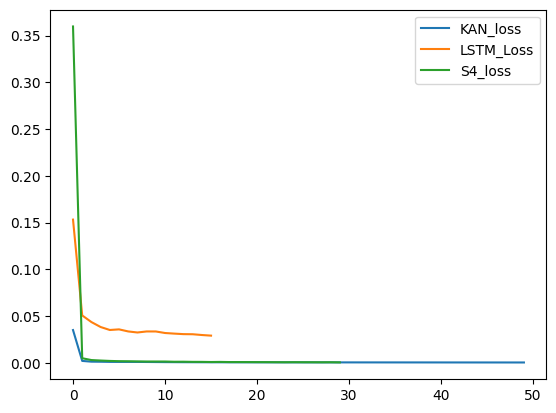

In [38]:
loss_record = pd.read_csv('loss_records.csv')
plt.plot(history.history['loss'], label='KAN_loss')
plt.plot(history_lstm.history['loss'], label='LSTM_Loss')
plt.plot(loss_record['train_loss'], label='S4_loss')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

MAE_LSTM = mean_absolute_error(df_predictions['values'], df_predictions['Pred RNN'])
MAE_S4 = mean_absolute_error(df_predictions['values'], df_predictions['Pred S4'])
MAE_KAN = mean_absolute_error(df_predictions['values'], df_predictions['Pred Tkan'])

print(MAE_LSTM, MAE_S4, MAE_KAN)

R2_LSTM = r2_score(df_predictions['values'], df_predictions['Pred RNN'])
R2_S4 = r2_score(df_predictions['values'], df_predictions['Pred S4'])
R2_KAN = r2_score(df_predictions['values'], df_predictions['Pred Tkan'])

print(R2_LSTM, R2_S4, R2_KAN)


MSE_LSTM = mean_squared_error(df_predictions['values'], df_predictions['Pred RNN'])
MSE_S4 = mean_squared_error(df_predictions['values'], df_predictions['Pred S4'])
MSE_KAN = mean_squared_error(df_predictions['values'], df_predictions['Pred Tkan'])

print(MSE_LSTM, MSE_S4, MSE_KAN)


7053.7793 5889.034765792112 6771.466
-18.817282840661452 -13.507703391817516 -17.161676482876423
52032244.0 38091411.45634083 47685280.0


In [40]:
import time
start_time= time.time() # set the time at which inference started
model.predict (X_test)
stop_time=time.time()
duration =stop_time - start_time
hours = duration // 3600
minutes = (duration - (hours * 3600)) // 60
seconds = duration - ((hours * 3600) + (minutes * 60))
msg_LSTM = f'training LSTM elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
print (msg_LSTM, flush=True)

start_time= time.time() # set the time at which inference started
model_tkan.predict(X_test)
stop_time=time.time()
duration =stop_time - start_time
hours = duration // 3600
minutes = (duration - (hours * 3600)) // 60
seconds = duration - ((hours * 3600) + (minutes * 60))
msg_TKAN = f'training TKAN elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
print (msg_TKAN, flush=True)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
training LSTM elapsed time was 0.0 hours,  0.0 minutes, 1.54 seconds)
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step
training TKAN elapsed time was 0.0 hours,  0.0 minutes, 2.64 seconds)


**References**

- Filipovi ́c, Damir, and Amir Khalilzadeh. “Machine learning for predicting
stock return volatility”.Swiss Finance Institute Research Paper, nos. 21–95, 2021.
- Genet, Remi, and Hugo Inzirillo. “A Temporal Kolmogorov-Arnold Transformer for Time Series Forecasting”. arXiv preprint arXiv:2406.02486, 2024.
- Gu, Albert, and Tri Dao. “Mamba: Linear-time sequence modeling with selective state spaces”. arXivpreprint arXiv:2312.00752, 2023.
- Gu, Albert, et al. “Efficiently modeling long sequences with structured state spaces”. arXiv preprintarXiv:2111.00396, 2021.
- Irfan, Mohammad, et al. Advanced Machine Learning Algorithms for Complex Financial Applications.IGI Global, 2023.
- Lim, Bryan, and Stefan Zohren. “Time-series forecasting with deep learning: a survey”. Philosophical Transactions of the Royal Society A, vol. 379, no. 2194, 2021, p. 20200209.
- Liu, Ziming, et al. “Kan: Kolmogorov-arnold networks”. arXiv preprint arXiv:2404.19756, 2024.
- Md Atik Ahameda, Qiang Chenga. “A Time Series is Worth 4 Mambas for Long-term Forecasting”.arXiv preprint arXiv:2403.09898, 2024.
- Selvin, Sreelekshmy, et al. “Stock price prediction using LSTM, RNN and CNN-sliding window model”.2017 international conference on advances in computing, communications and informatics (icacci).IEEE, 2017, pp. 1643–47.
- Shi, Zhuangwei. “Selective state space model for stock prediction”. arXiv preprint arXiv:2402.18959,2024.
- Yuan, Mingsheng, et al. “Is Mamba Effective for Time Series Forecasting?” arXiv preprint arXiv:2403.11144,2024.

